# 0. Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


import warnings
warnings.filterwarnings('ignore')

# 1. Meet The Data

In [2]:
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2. Data Exploration & Manipulation

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


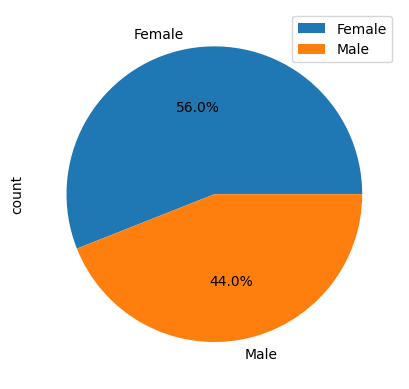

In [5]:
df['Genre'].value_counts().plot.pie(autopct='%1.1f%%', legend=True);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


As we see, data types are correct and there is no null values as well.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


We will choose to work with std scaler, so this rescales the features to a fixed range, typically [0, 1].


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

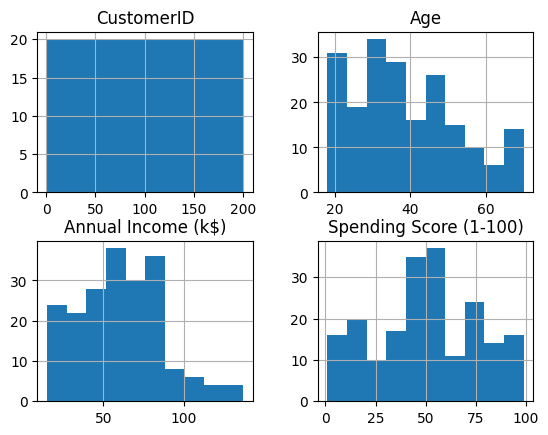

In [8]:
df.select_dtypes(exclude='O').hist()

check for duplications

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.select_dtypes(exclude='O').columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# 3. Preprocessing

- Drop customer IDs, as they are considered a high-cardinality variable.


In [12]:
df.drop(columns='CustomerID', axis=1, inplace=True)

Note that in clustering we don't need actually to split our data like in supervised machine learning tasks.

In [13]:
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [14]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# 4. KMeans Clustering

## 4.1 Determine Number of Clusters

### 4.1.1 Pair Plot Visualization

At first I'd like to visualize pairs of features to explore their relationships and assess how well they can be separated based on these two features.

This analysis will help us understand the underlying patterns in the data and the potential for clustering.


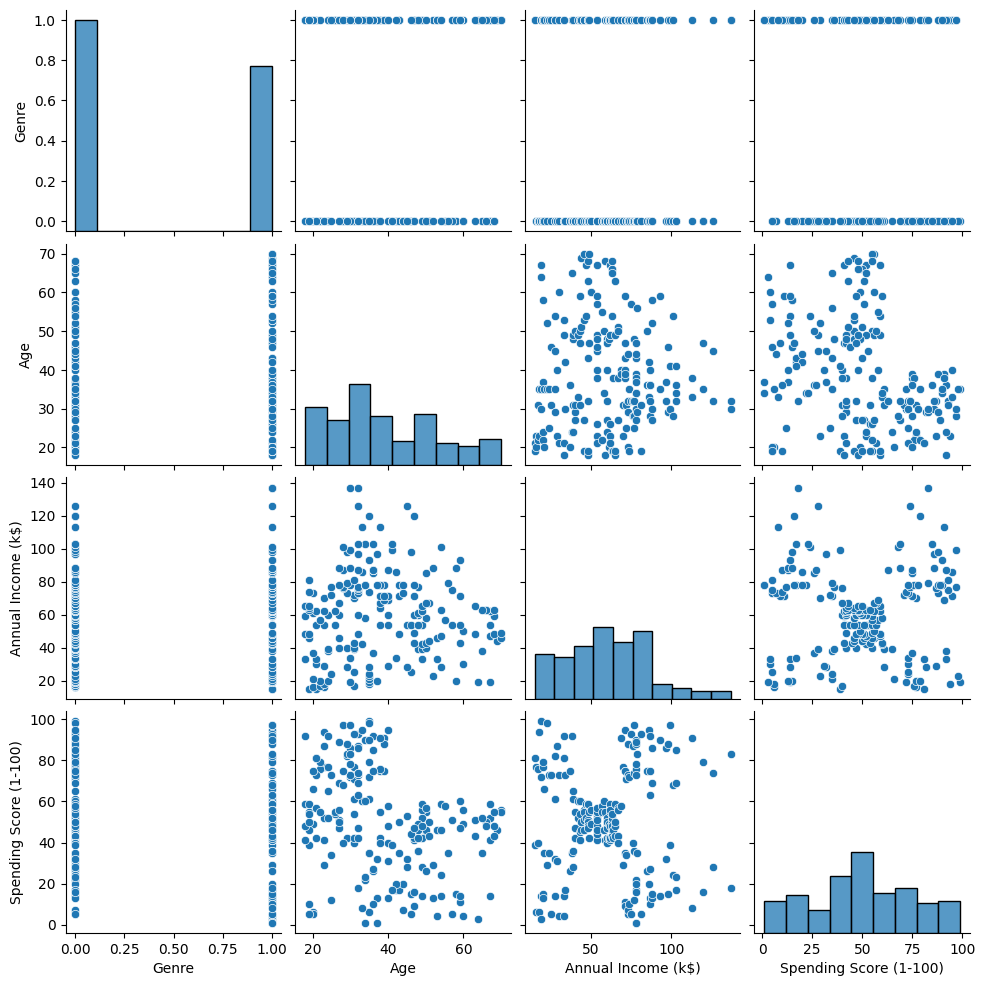

In [15]:
sns.pairplot(df);

We can see that there are 5 clusters based on the features : Spending Score (1-100) and Annual Income (k$).

But let's also explore how we can determin number of clusters using other methods.

### 4.1.2 Elbow Method

In [16]:
k_range = range(1, 10)
kmeans_scores = []
for k in k_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df)
    kmeans_scores.append(kmeans_model.inertia_)
    print(f'at k = {k}, inertia = {kmeans_scores[-1]}')


at k = 1, inertia = 308862.06000000006
at k = 2, inertia = 212889.44245524297
at k = 3, inertia = 143391.59236035676
at k = 4, inertia = 104414.67534220166
at k = 5, inertia = 75399.61541401483
at k = 6, inertia = 58348.641363315044
at k = 7, inertia = 51132.7032125769
at k = 8, inertia = 44389.807673557676
at k = 9, inertia = 40948.792950799194


Text(0.5, 1.0, 'elbow method')

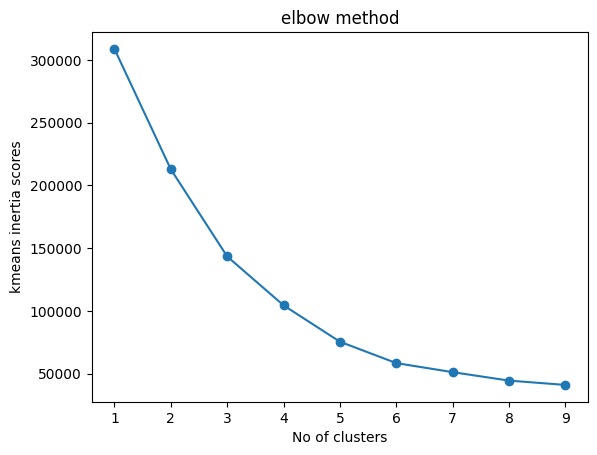

In [17]:
plt.plot(k_range, kmeans_scores, marker='o')
plt.xlabel('No of clusters')
plt.ylabel('kmeans inertia scores')
plt.title('elbow method')

### 4.1.3 Sileuotte Score

In [18]:
k_range = range(2, 10)
silhouette_scores = []
for k in k_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans_model.predict(df)))
    print(f'at k = {k}, silhouette score = {silhouette_scores[-1]}')


at k = 2, silhouette score = 0.29307334005502633
at k = 3, silhouette score = 0.383798873822341
at k = 4, silhouette score = 0.4052954330641215
at k = 5, silhouette score = 0.44482259384548795
at k = 6, silhouette score = 0.45205475380756527
at k = 7, silhouette score = 0.43946743327036053
at k = 8, silhouette score = 0.4277721345758326
at k = 9, silhouette score = 0.4134123971780628


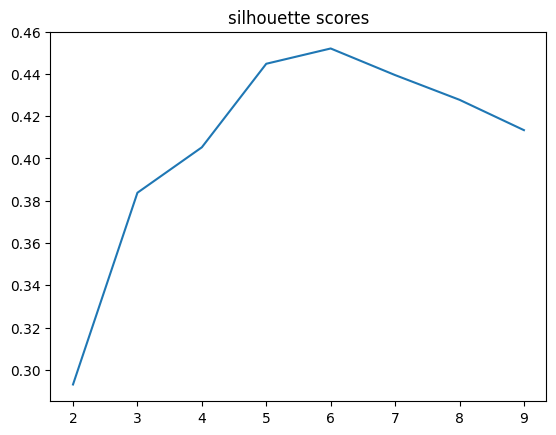

In [19]:
plt.plot(k_range, silhouette_scores)
plt.title('silhouette scores');

As we can see k with values 4, 5, or 6 may be appropriate so lets visulaize using pca first..

at k = 4, silhouette score = 0.4052954330641215

at k = 5, silhouette score = 0.43959178858284587

at k = 6, silhouette score = 0.45205475380756527

### 4.1.4 Visualization after applying PCA

In [20]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

In [21]:
df_pca.shape

(200, 2)

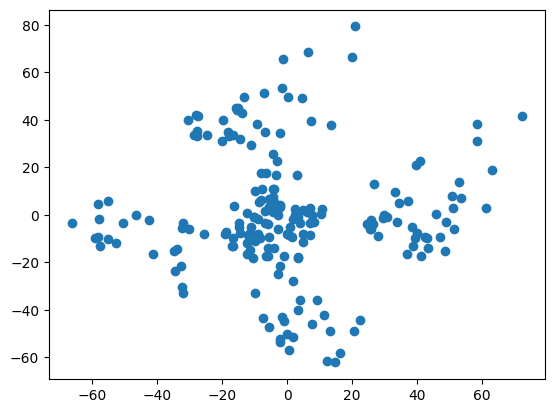

In [22]:
plt.scatter(df_pca[:, 0], df_pca[:, 1])

In [23]:
kmeans_after_pca = KMeans(n_clusters=5)
labels = kmeans_after_pca.fit_predict(df_2d)

NameError: name 'df_2d' is not defined

In [ ]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)

Excellent!

# 4.2 Final Kmeans Model with k = 5

In [ ]:
kmeans_model = KMeans(n_clusters=5)
labels = kmeans_model.fit_predict(df)

In [ ]:
df['cluster'] = labels

In [ ]:
sns.pairplot(df, hue='cluster', palette='Set1')

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


# 5. Hierarchical clustering

In [ ]:
agg_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = agg_model.fit_predict(df)


In [ ]:
df['cluster'] = labels

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels)

In [ ]:
# TODO: GMM clustering